# Bike Rental Analysis

In this mini-project, we analyze a bike rental company.

We have rental data covering two years: from January 4, 2015 to January 3, 2017. Or aim is to explore the dynamics of rental activity, to investigate its relationship with weather conditions and weekends/holidays, and to explain several anomalies seen in the data.

### Data description:
The dataset contains the following fields:

timestamp – Date and time (accurate to the hour)

cnt – Number of bike rentals during that hour

t1 – Temperature in degrees Celsius

t2 – "Feels like" temperature in degrees Celsius

hum – Humidity (in %)

wind_speed – Wind speed (in km/h)

weather_code – Weather conditions:

    1 – Clear sky (SKC)

    2 – Mostly clear / scattered clouds (SCT)

    3 – Cloudy / significant clouds (BKN)

    4 – Overcast (OVC)

    7 – Light rain / rain shower / drizzle

    10 – Rain with thunderstorm

    26 – Snowfall

    94 – Freezing fog (yes, it exists!)

isholiday – Whether the day is a public holiday (1 – yes, 0 – no)

isweekend – Whether the day is a weekend (1 – yes, 0 – no)

season – Meteorological season:

    0 – Spring

    1 – Summer

    2 – Autumn

    3 – Winter

# Importing Libraries and Dataset

In [329]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,4)}, style="white")
sns.set_style("white")

In [456]:
df = pd.read_csv('london.csv')

In [458]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [460]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# Exploratory Data Analysis (EDA)

In [86]:
df.shape

(17414, 10)

In [88]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [90]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### EDA Summary:

The dataset consists of 17414 rows and 10 columns, including 9 numerical and 1 categorical features.

There are no missing values in dataset.

The 'timestamp' column is of object type, so for proper analysis, we need to convert it to datetime format.

# Data Preprocessing

In [94]:
# convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [96]:
# rename column 'timestamp' to 'date'
df.rename(columns = {'timestamp': 'date'}, inplace=True)

In [98]:
# check
df.dtypes

date            datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [100]:
# sort df by date
df.sort_values('date', inplace=True)

In [102]:
# transfer date to index
df.set_index('date', drop=False, inplace=True)

For further analysis, we extract date components from the date column.

In [105]:
df['only_date'] = df['date'].dt.date # extract the date only
df['day_of_week'] = df['date'].dt.day_name() # extract the day of week name
df['day_of_week_num'] = df['date'].dt.dayofweek # extract the day of week number
df['hour'] = df['date'].dt.hour # extract the hour
df['month'] = df['date'].dt.month_name() # extract the month

In [107]:
df.head()

,date,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,only_date,day_of_week,day_of_week_num,hour,month
date,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04,Sunday,6,0,January
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04,Sunday,6,1,January
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04,Sunday,6,2,January
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04,Sunday,6,3,January
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04,Sunday,6,4,January


In [109]:
# we need to check that the values in the 'day_of_week_num' column match the values in the 'is_weekend' column
df['check'] = ((df['day_of_week_num'] >= 5).astype(int) == df['is_weekend'])
df.check.unique()

array([ True])

We see that days of week are correctly identified fro the date.

# Analysis

### Q1. Weekday Analysis.

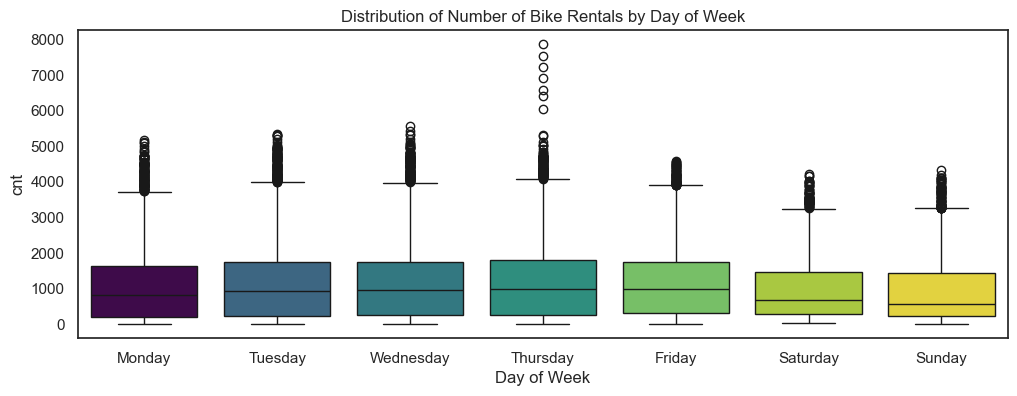

In [331]:
# creating a boxplot to show the distribution of number of bike rentals across the days of the week
day_colors = {
    'Monday': '#440154',
    'Tuesday': '#31688e', 
    'Wednesday': '#26828e',
    'Thursday': '#1f9e89',
    'Friday': '#6ece58',
    'Saturday': '#b5de2b',
    'Sunday': '#fde725'
}
sns.boxplot(x='day_of_week', y='cnt', data=df, hue='day_of_week',
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
            palette=day_colors)
plt.title('Distribution of Number of Bike Rentals by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('cnt')
plt.show()

The box plots reveal that Thursday displays the greatest variability with outliers reaching up to 8,000 rentals, while weekends show more compressed distributions with fewer extreme values. Working days demonstrate wider interquartile ranges compared to weekends, indicating higher day-to-day variability in rental demand. The medians and the spread of the data are quite similar across the whole week except weekends.

In [123]:
# creating a separate dataframe grouped by weekday and calculate the average value of cnt for each weekday
df_weekday = df.groupby('day_of_week', as_index=False).agg({'cnt': 'mean'})

In [125]:
df_weekday.head()

,day_of_week,cnt
0,Friday,1182.772653
1,Monday,1130.270734
2,Saturday,995.553753
3,Sunday,959.567265
4,Thursday,1258.810594


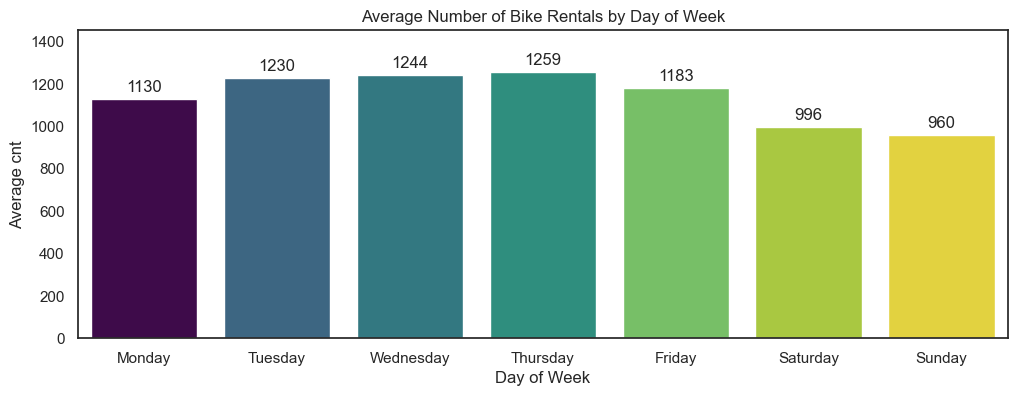

In [333]:
# bar plot of average values by weekday
ax = sns.barplot(x='day_of_week', y='cnt', data=df_weekday, hue='day_of_week',
                 order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                 palette=day_colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)
plt.title('Average Number of Bike Rentals by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average cnt')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.1)
plt.show()

Weekdays consistently show higher average rental activity (1,130 - 1,259 bikes) compared to weekends (960 - 996 bikes), with Thursday being the peak day.

### Q1 Summary:
Taken together, the analysis shows that rental activity is generally higher and more volatile on weekdays compared to weekends, with averages peaking on Thursday.

### Q2. Hourly Analysis.

We are dividing the 24 hours of the day, shown in the 'hour' column, into intervals to facilitate analysis of data by time of day.

In [269]:
bins = [0, 4, 8, 12, 16, 20, 24]
labels_1 = ['12AM-4AM', '4AM-8AM', '8AM-12PM', '12PM-4PM', '4PM-8PM', '8PM-12AM']
labels_2 = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
df['hour_int'] = pd.cut(df['hour'], bins=bins, labels=labels_1, right=False)
df['hour_label'] = pd.cut(df['hour'], bins=bins, labels=labels_2, right=False)

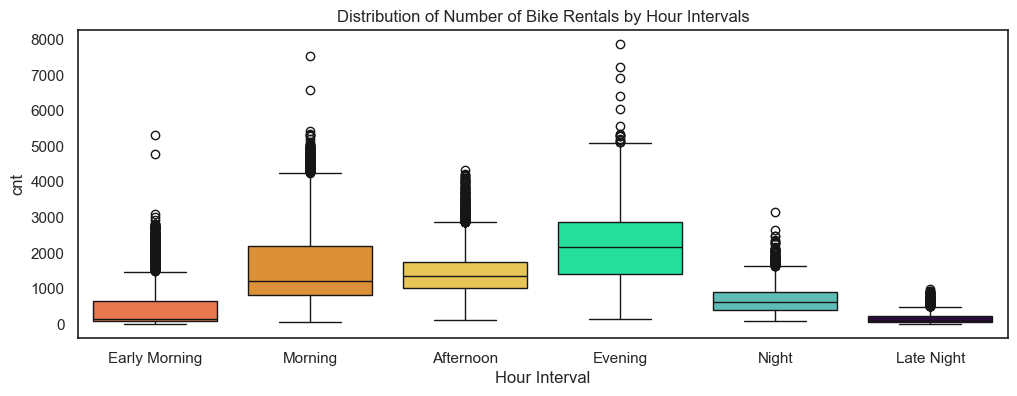

In [335]:
# creating a boxplot to show the distribution of number of bike rentals across the time of the day
time_colors = {
    'Late Night': '#2E0249',
    'Early Morning': '#FF6B35',
    'Morning': '#F7931E',
    'Afternoon': '#FFD23F',
    'Evening': '#06FFA5',
    'Night': '#4ECDC4'
}
sns.boxplot(x='hour_label', y='cnt', data=df, hue='hour_label',
            order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'],
            palette=time_colors)
plt.title('Distribution of Number of Bike Rentals by Hour Intervals')
plt.xlabel('Hour Interval')
plt.ylabel('cnt')
plt.show()

The distribution analysis shows that Evening period shows the highest median rentals (more than 2,000) with significant variability and outliers reaching up to 8,000 rentals. Morning and Afternoon demonstrates the second highest activity with medians around 1,500; in the Mornings there are also notable outliers up to 7,500 rentals. Afternoon shows moderate activity with a median of approximately 1,400. Early Morning and Late Night periods exhibit the most compressed distributions with minimal variability and very low median values below 500 rentals.

In [273]:
# creating a separate dataframe grouped by hour intervals and calculate the average value of cnt for each hour interval
df_hour = df.groupby('hour_label', as_index=False, observed=False).agg({'cnt': 'mean'})

In [275]:
df_hour.head()

,hour_label,cnt
0,Late Night,180.582699
1,Early Morning,531.361092
2,Morning,1687.125043
3,Afternoon,1494.024022
4,Evening,2244.931342


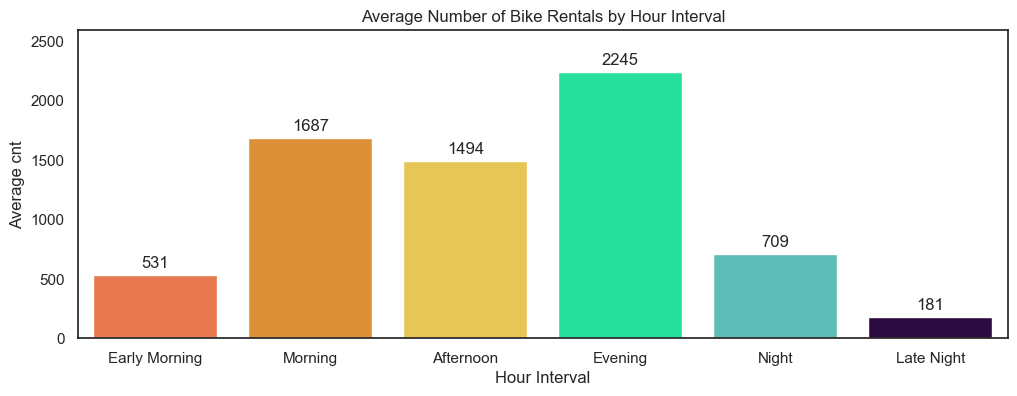

In [337]:
# bar plot of average values by time of the day
ax = sns.barplot(x='hour_label', y='cnt', data=df_hour, hue='hour_label',
            order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'],
            palette=time_colors)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)
plt.title('Average Number of Bike Rentals by Hour Interval')
plt.xlabel('Hour Interval')
plt.ylabel('Average cnt')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.1)
plt.show()

The hourly analysis confirms a clear bimodal pattern with Evening hours showing the peak at 2,245 rentals, followed by Morning at 1,687 rentals. Afternoon maintains moderate activity at 1,494 rentals, while Late Night shows the lowest usage at only 181 rentals on average.

### Q2 Summary:
The hour analysis shows that maximum rental activity refers to Evening time (4PM-8PM) while minimum was shown in Late Night (12AM-4AM).

### Q3. Seasonal and Weather Analysis.

In [377]:
# create pivot for seasons vs weather conditions analysis
month_weather_pivot = df.pivot_table(index='month', columns='weather_code', values='cnt', aggfunc='mean')
month_weather_pivot.fillna(0, inplace=True)

In [379]:
# rename columns with weather codes to weather conditions labels
month_weather_pivot = month_weather_pivot.rename(columns={
    1: 'Clear sky',
    2: 'Mostly clear',
    3: 'Cloudy',
    4: 'Overcast',
    7: 'Light rain',
    10: 'Rain/Thunderstorm',
    26: 'Snowfall',
    94: 'Freezing fog'
})

In [385]:
# sort months in index
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_weather_pivot = month_weather_pivot.reindex(month_order)

In [387]:
month_weather_pivot.head()

weather_code,Clear sky,Mostly clear,Cloudy,Overcast,Light rain,Rain/Thunderstorm,Snowfall
month,,,,,,,
January,700.576596,1113.110749,962.009091,369.063158,531.347328,228.0,176.181818
February,772.513158,1062.629630,932.207101,634.492537,490.404372,0.0,460.636364
March,939.814815,1110.420561,1093.603604,513.800000,624.203390,0.0,24.000000
April,1127.354520,1506.811847,1139.469945,465.918033,671.947368,802.5,125.333333
May,1325.767521,1678.838617,1255.479167,513.955556,737.903955,774.0,0.000000


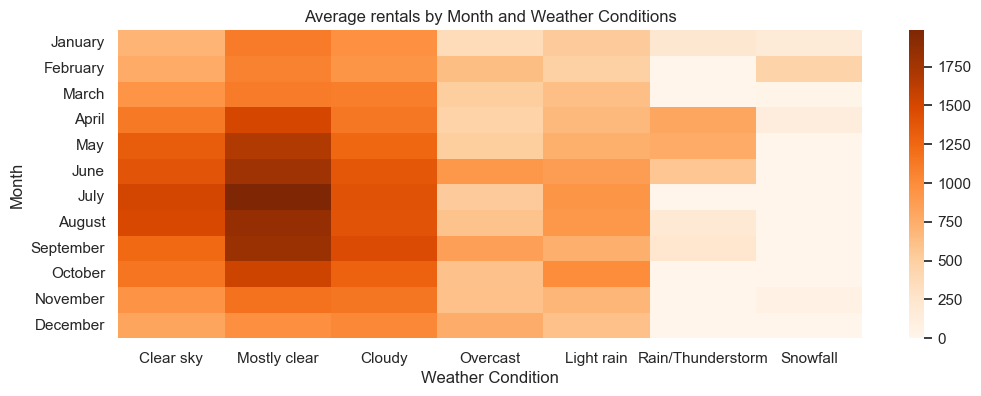

In [389]:
# create heatmap
sns.heatmap(month_weather_pivot, cmap="Oranges")
plt.title("Average rentals by Month and Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Month")
plt.show()

### Q3 Summary:
The heatmap displays the average number of bike rentals for each month under different weather conditions. Lighter shades represent lower rental activity, while darker shades indicate higher activity.

It is clear from the heatmap that the highest average rental numbers occur during the summer months (June–August) under clear or mostly clear skies. Conversely, rainy, thunderstorm, and snowy conditions correspond to lower rental activity throughout the year.

Overall, this visualization shows the combined effect of seasonality and weather on bike rentals, highlighting “hot” periods with both favorable weather and high demand.

### Q4. Finding Anomalies in Rental Data.

We performed a time series analysis to identify anomalies in the rental data.

Since we are going to analyze time series data, we resampled it to a daily frequency to make trends and patterns more visible and meaningful.

**1.** We created new df with daily bikes rent data specially for further analysis.

In [398]:
# daily rent data
daily_rent = df.resample('D').agg({'cnt':'sum'})

In [400]:
daily_rent.head()

,cnt
date,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601


**2.** Exploring the number of trips by date and time.

<Axes: xlabel='date', ylabel='cnt'>

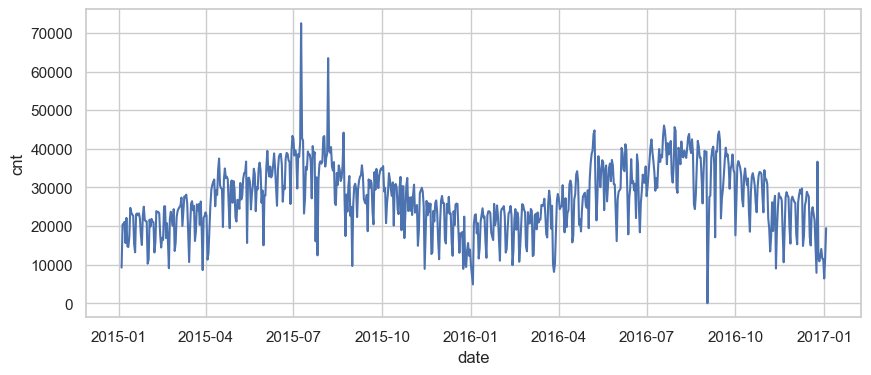

In [324]:
sns.lineplot(data=daily_rent, x='date', y='cnt')

The number of trips remained stable throughout the entire period, but there were several significant peaks and drops that need to be investigated further.

**3.** Сonstruct a confidence interval around the data — anything that falls outside this range will be considered an anomaly, and we will later take a closer look at some of them.

In [405]:
# calculate the moving average to smooth the time series
daily_rent_roll = daily_rent.rolling(window=3).mean()

In [407]:
daily_rent_roll.head()

,cnt
date,
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,16739.666667
2015-01-07,20683.000000
2015-01-08,19092.666667


<Axes: xlabel='date', ylabel='cnt'>

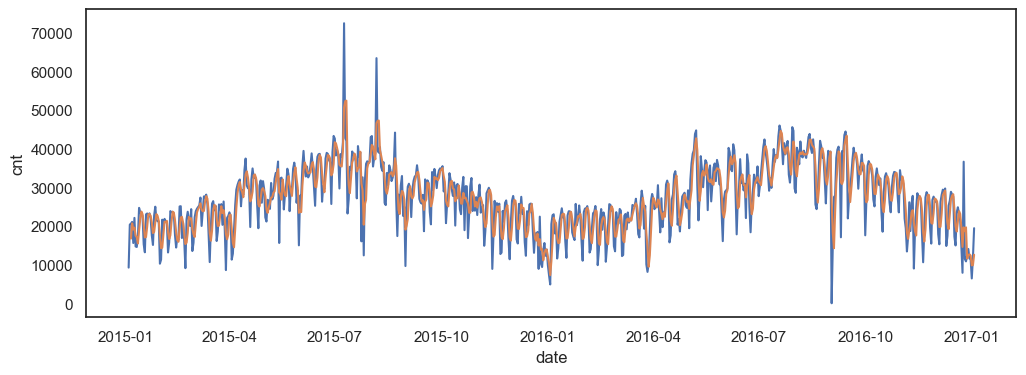

In [409]:
# let's see how the graph has smoothed out
sns.lineplot(data=daily_rent, x='date', y='cnt')
sns.lineplot(data=daily_rent_roll, x='date', y='cnt')

In [426]:
# finding the diff bw the observed values and the rolling mean for each date
# and then calculate the standard deviation of these differences
std = np.std(daily_rent['cnt'] - daily_rent_roll['cnt'])

In [428]:
# construct a confidence interval
upper_bound = daily_rent_roll.cnt + (2.576 * std)
lower_bound = daily_rent_roll.cnt - (2.576 * std)

In [430]:
daily_rent['upper_bound'] = upper_bound
daily_rent['lower_bound'] = lower_bound

In [432]:
daily_rent.head()

,cnt,upper_bound,lower_bound
date,,,
2015-01-04,9234,NaN,NaN
2015-01-05,20372,NaN,NaN
2015-01-06,20613,28482.585854,4996.747479
2015-01-07,21064,32425.919188,8940.080812
2015-01-08,15601,30835.585854,7349.747479


**4.** Examine unusually high values.

Let's find the observations where the observed values exceed the upper bound of the 99% confidence interval.

Finding the day where diff is maximum.

In [439]:
daily_rent[daily_rent.cnt > daily_rent.upper_bound]

,cnt,upper_bound,lower_bound
date,,,
2015-07-09,72504,62447.919188,38962.080812
2015-08-06,63468,58370.252521,34884.414146
2016-09-04,27512,26001.919188,2516.080812
2016-12-25,36653,31393.585854,7907.747479


#### Q4 Summary:
Based on the analysis, the number of rentals on 2015-07-09 significantly exceeded the upper bound of the 99% confidence interval.

This date coincides with a 24-hour strike by London Underground workers, which likely increased demand for alternative transportation options, including rentals.

It was also a Thursday, which helps explain the outlier points in the boxplot and the peaks observed in the weekday analysis.

# Overall Project Conclusion:
The analysis of bike rental data demonstrates that user activity is strongly influenced by weekdays, time of day, weather conditions, and seasonality. 

Rentals are highest and most variable on weekdays, peaking on Thursdays, while weekends show consistently lower and more stable demand.

The hourly analysis shows the highest activity in the evening (4PM – 8PM), followed by the morning, and minimal activity during late night and early morning hours.

Seasonal and weather factors also play a significant role: summer months with clear or mostly clear skies see the highest rental numbers, whereas rain, thunderstorms, and snow correspond to lower activity throughout the year.

An exceptional event, such as a 24-hour London Underground strike, which took place on 2015-07-09, was identified through time series analysis. It generated extreme demand spikes of bike rentals that exceed typical ranges.

Overall, bike rental demand is shaped by a combination of calendar, temporal, and external factors, with the greatest activity observed on weekdays during busy hours, while extreme values are often linked to unusual events or specific weather conditions.